In [2]:
# Library Imports

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import r_regression

In [3]:
# Dataframe imports

low_carbon_share_gdp = pd.read_csv('owid_datasets\share-of-low-carbon-energy-vs-gdp.csv')
oil_production_capita = pd.read_csv('owid_datasets\oil-prod-per-capita.csv')
human_development_index = pd.read_csv('owid_datasets\human-development-index.csv')
chess = pd.read_csv('datasets\players_in_chess.csv')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.loc[world['name'] == 'France', 'iso_a3'] = 'FRA'
world.loc[world['name'] == 'Norway', 'iso_a3'] = 'NOR'
world.loc[world['name'] == 'N. Cyprus', 'iso_a3'] = 'CYP'
world.loc[world['name'] == 'Somaliland', 'iso_a3'] = 'SOM'
world.loc[world['name'] == 'Kosovo', 'iso_a3'] = 'RKS'

plt.style.use('bmh')

# Filtering to 2019 data only

# gdp_per_capita.drop(gdp_per_capita[gdp_per_capita.Year != 2019].index, inplace=True)
# renewable_share.drop(renewable_share[renewable_share.Year != 2019].index, inplace=True)
# fossil_renewable_electricity.drop(fossil_renewable_electricity[fossil_renewable_electricity.Year != 2019].index, inplace=True)
# pollution_deaths_per_100000.drop(pollution_deaths_per_100000[pollution_deaths_per_100000.Year != 2019].index, inplace=True)

# gdp_per_capita = gdp_per_capita.dropna(subset='Code')
# renewable_share = renewable_share.dropna(subset='Code')
# pollution_deaths_per_100000.dropna(subset='Code', inplace=True)
# fossil_renewable_electricity = fossil_renewable_electricity.dropna()
chess.dropna(subset='blitz_rating', inplace=True)
low_carbon_share_gdp.dropna(inplace=True)
oil_production_capita.dropna(inplace=True)
oil_production_capita.drop(oil_production_capita[oil_production_capita.Year != 2015].index, inplace=True)
human_development_index.dropna(inplace=True)
human_development_index.drop(human_development_index[human_development_index.Year != 2015].index, inplace=True)

tnrfont = {'fontname':'Times New Roman'}

Mean squared error: 246.16
Coefficient of determination: 0.13
Pearson Correlation Coefficient: 0.36


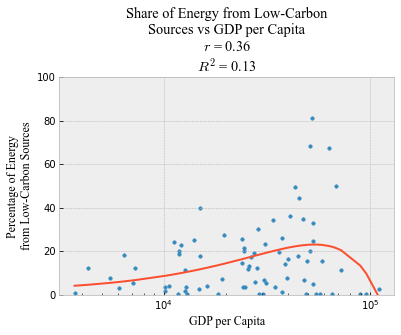

In [12]:
# Percentage of energy from low carbon sources vs GDP per capita

low_carbon_share_gdp.sort_values('GDP per capita, PPP (constant 2017 international $)', inplace=True)

title = 'Share of Energy from Low-Carbon\nSources vs GDP per Capita'
degree = 2
marker_size = 50
x = np.array(low_carbon_share_gdp['GDP per capita, PPP (constant 2017 international $)'].tolist(), dtype=np.float64).reshape(-1, 1)
y = np.array(low_carbon_share_gdp['Low-carbon energy (% sub energy)'].tolist(), dtype=np.float64).reshape(-1, 1)

plt.scatter(x, y, marker_size, marker='.')
plt.ylim(0, 100)
plt.xscale('log')

# model = LinearRegression().fit(x, y)
# line = model.predict(x)

polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression()).fit(x, y)
line = polyreg.predict(x)

print("Mean squared error: %.2f" % mean_squared_error(y, line))
print("Coefficient of determination: %.2f" % r2_score(y, line))
print("Pearson Correlation Coefficient: %.2f" % r_regression(y, line.ravel()))

plt.title(f'{title}\n$r$ = {round(r_regression(y, line.ravel())[0], 2)}\n$R^2$ = {round(r2_score(y, line), 2)}', **tnrfont)
plt.xlabel('GDP per Capita', **tnrfont)
plt.ylabel('Percentage of Energy\nfrom Low-Carbon Sources', **tnrfont)
plt.plot(x, line, color='#fc4f30')
plt.savefig('output\low_carbon_gdp_per_capita.jpg', dpi=600, bbox_inches='tight')

Mean squared error: 195.23
Pearson Correlation Coefficient: 0.19
Coefficient of determination: 0.03


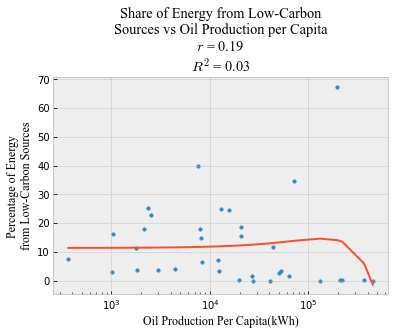

In [5]:
# Oil production per capita vs Renewable

merged = pd.merge(oil_production_capita, low_carbon_share_gdp, on=['Code', 'Year', 'Entity'])

merged.head()

# Percentage of energy from low carbon sources vs GDP per capita

merged.sort_values('Oil production per capita (kWh)', inplace=True)

title = 'Share of Energy from Low-Carbon\nSources vs Oil Production per Capita'
degree = 2
marker_size = 50
x = np.array(merged['Oil production per capita (kWh)'].tolist(), dtype=np.float64).reshape(-1, 1)
y = np.array(merged['Low-carbon energy (% sub energy)'].tolist(), dtype=np.float64).reshape(-1, 1)

plt.scatter(x, y, marker_size, marker='.')
plt.xscale('log')

# model = LinearRegression().fit(x, y)
# line = model.predict(x)

polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression()).fit(x, y)
line = polyreg.predict(x)

print("Mean squared error: %.2f" % mean_squared_error(y, line))
print("Pearson Correlation Coefficient: %.2f" % r_regression(y, line.ravel()))
print("Coefficient of determination: %.2f" % r2_score(y, line))

plt.title(f'{title}\n$r$ = {round(r_regression(y, line.ravel())[0], 2)}\n$R^2$ = {round(r2_score(y, line), 2)}', **tnrfont)
plt.xlabel('Oil Production Per Capita(kWh)', **tnrfont)
plt.ylabel('Percentage of Energy\nfrom Low-Carbon Sources', **tnrfont)
plt.plot(x, line, color='#fc4f30')
plt.savefig('output\share_vs_oil_prod.jpg', dpi=600, bbox_inches='tight')

Mean squared error: 230.07
Pearson Correlation Coefficient: 0.43
Coefficient of determination: 0.19


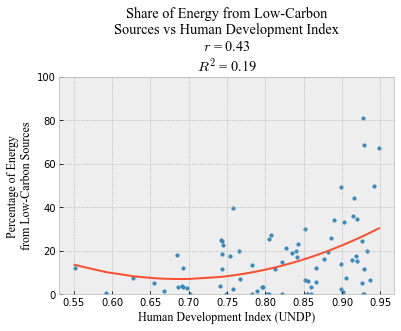

In [6]:
# Oil production per capita vs Renewable

merged = pd.merge(human_development_index, low_carbon_share_gdp, on=['Code', 'Year'])

merged.head()

# Percentage of energy from low carbon sources vs GDP per capita

merged.sort_values('Human Development Index (UNDP)', inplace=True)

title = 'Share of Energy from Low-Carbon\nSources vs Human Development Index'
degree = 2
marker_size = 50
x = np.array(merged['Human Development Index (UNDP)'].tolist(), dtype=np.float64).reshape(-1, 1)
y = np.array(merged['Low-carbon energy (% sub energy)'].tolist(), dtype=np.float64).reshape(-1, 1)

plt.scatter(x, y, marker_size, marker='.')
plt.ylim(0, 100)

# model = LinearRegression().fit(x, y)
# line = model.predict(x)

polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression()).fit(x, y)
line = polyreg.predict(x)

print("Mean squared error: %.2f" % mean_squared_error(y, line))
print("Pearson Correlation Coefficient: %.2f" % r_regression(y, line.ravel()))
print("Coefficient of determination: %.2f" % r2_score(y, line))

plt.title(f'{title}\n$r$ = {round(r_regression(y, line.ravel())[0], 2)}\n$R^2$ = {round(r2_score(y, line), 2)}', **tnrfont)
plt.xlabel('Human Development Index (UNDP)', **tnrfont)
plt.ylabel('Percentage of Energy\nfrom Low-Carbon Sources', **tnrfont)
plt.plot(x, line, color='#fc4f30')
plt.savefig('output\share_vs_hdi.jpg', dpi=600, bbox_inches='tight')

C:\Users\hanzp\AppData\Local\Temp\ipykernel_22148\447497046.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  colourbar.set_yticklabels(colourbar.get_yticklabels(), fontsize=32, fontname='Times New Roman')


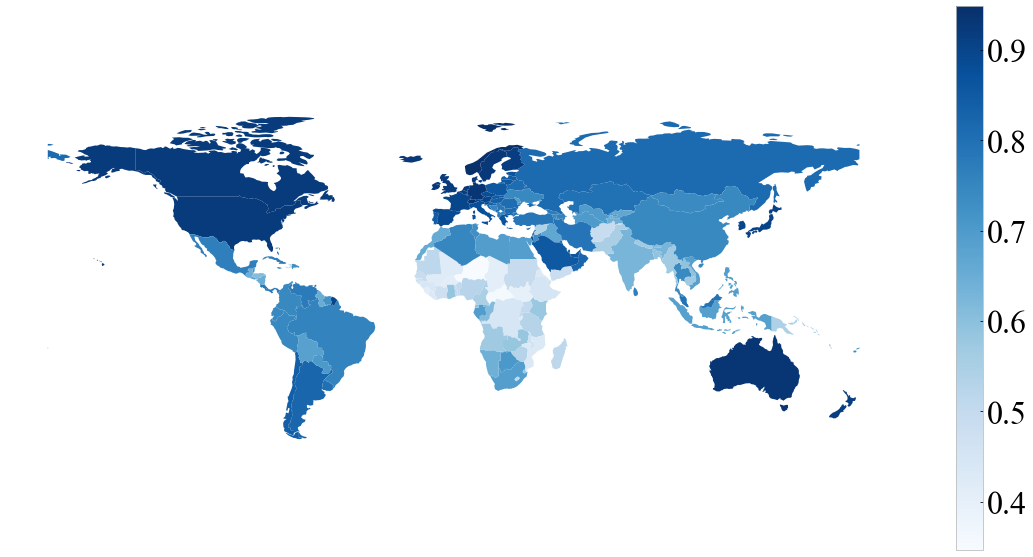

In [10]:
renamed_hdi = human_development_index.rename(columns={'Code':'iso_a3','Entity':'name'})
map_merged = pd.merge(world, renamed_hdi, on=['iso_a3'])
map_merged.head(10)

map = map_merged.plot(column='Human Development Index (UNDP)', figsize=(20, 10), legend=True, cmap='Blues')
# map.set_yticklabels([])
# map.set_xticklabels([])

colourbar = map.get_figure().get_axes()[1]
colourbar.set_yticklabels(colourbar.get_yticklabels(), fontsize=32, fontname='Times New Roman')
plt.axis('off')
plt.savefig('output\hdi_map.jpg', dpi=600, bbox_inches='tight')

C:\Users\hanzp\AppData\Local\Temp\ipykernel_22148\2873026987.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  colourbar.set_yticklabels(colourbar.get_yticklabels(), fontsize=32, fontname='Times New Roman')


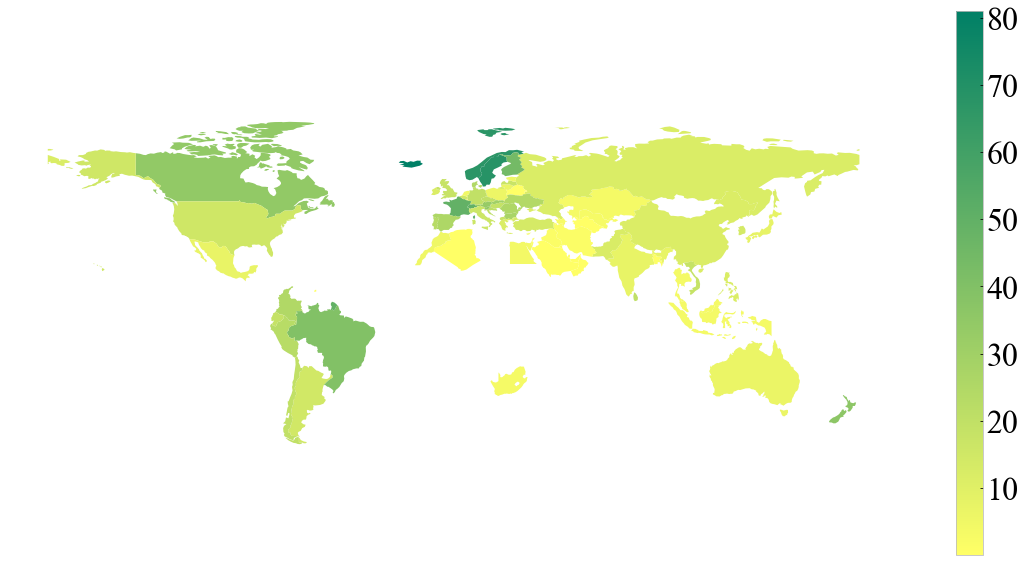

In [11]:
renamed_lcs = low_carbon_share_gdp.rename(columns={'Code':'iso_a3','Entity':'name'})
map_merged = pd.merge(world, renamed_lcs, on=['iso_a3'])
map_merged.head(10)

map = map_merged.plot(column='Low-carbon energy (% sub energy)', figsize=(20, 10), legend=True, cmap='summer_r')

plt.axis('off')
colourbar = map.get_figure().get_axes()[1]
colourbar.set_yticklabels(colourbar.get_yticklabels(), fontsize=32, fontname='Times New Roman')
# map.set_yticklabels([])
# map.set_xticklabels([])
plt.savefig('output\share_map.jpg', dpi=600, bbox_inches='tight')

In [9]:
# # Chess test
# chess.sort_values('rating', inplace=True)

# x = np.array(chess['rating'].tolist(), dtype=np.float64).reshape(-1, 1)
# y = np.array(chess['blitz_rating'].tolist(), dtype=np.float64).reshape(-1, 1)

# plt.scatter(x, y, 1, marker=',', alpha=0.2)

# # model = LinearRegression().fit(x, y)
# # line = model.predict(x)

# polyreg = make_pipeline(PolynomialFeatures(2),LinearRegression()).fit(x, y)
# line = polyreg.predict(x)

# print("Mean squared error: %.2f" % mean_squared_error(y, line))
# print("Coefficient of determination: %.2f" % r2_score(y, line))
# print("Pearson Correlation Coefficient: %.2f" % r_regression(y, line.ravel()))

# plt.title(f'Correlation between FIDE and Blitz Ratings of Chess players\n$r$ = {round(r_regression(y, line.ravel())[0], 2)}\n$R^2$ = {round(r2_score(y, line), 2)}')
# plt.plot(x, line, color='#fc4f30')
# plt.savefig('output/chess_ratings.jpg', dpi=600)